In [15]:
# !pip install scikit-learn plotly nbformat umap-learn

In [35]:
from transformers import AutoTokenizer, DistilBertModel
import torch
import pandas
import matplotlib.pyplot as plt

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

In [36]:
color_words = ['red', 'orange', 'gold', 'yellow', 'green', 'cyan', 'turquoise', 'blue', 'indigo', 'violet', 'purple', 'lavender', 'magenta', 'maroon', 'pink', 'brown', 'black', 'white', 'gray', 'silver']

print(len(color_words))

20


In [10]:
# forced_sentence = f"The color is {color_words[-4]}."
# # forced_sentence = f"The artists used {color_words[-4]} paint because they like the color."
# inputs = tokenizer(forced_sentence, return_tensors="pt") 
# outputs = model(**inputs)
# # last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
# last_hidden_states = outputs.last_hidden_state

In [11]:
# print(inputs)
# print(outputs)
# print(last_hidden_states.shape)

In [12]:
# print("Length of inputs string: ", inputs['input_ids'].shape)

# # print index, token, and matching token id
# for i in range(len(inputs['input_ids'][0])):
#     print(f'{i}: {inputs["input_ids"][0][i]}: {tokenizer.decode([inputs["input_ids"][0][i]])}')

In [13]:
# extract the contextual word embedding for the color word, beginning at the 5th token and ending before the input id 6773
# color_word_emb = []
# idx = 4

# while inputs['input_ids'][0][idx] != 1012:
#     print(idx)
#     color_word_emb.append(last_hidden_states[0][idx])
#     idx += 1

# mean_color_word_emb = torch.mean(torch.stack(color_word_emb), dim=0)
# print(mean_color_word_emb.shape)

In [14]:
# sanity check
# print(mean_color_word_emb - last_hidden_states[0][4])
# print(torch.sum(abs(mean_color_word_emb - last_hidden_states[0][4])))

In [48]:
color_embeddings = []

for color_word in color_words:
    forced_sentences = []
    forced_sentences.append(f"The color is {color_word}.")
    forced_sentences.append(f"The artists used {color_word} paint because they like the color.")
    forced_sentences.append(f"The {color_word} hats are on sale.")

    color_word_start = [4, 4, 2]
    color_word_next = [".", "paint", "hats"]
    
    mean_color_word_embs = []
    
    for i, forced_sentence in enumerate(forced_sentences):
        inputs = tokenizer(forced_sentence, return_tensors="pt") 
        outputs = model(**inputs)
        # last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
        last_hidden_states = outputs.last_hidden_state

        color_word_emb = []
        idx = color_word_start[i]
        end_token = tokenizer.encode(color_word_next[i])[1]
        # print(end_token)
        # this is a hacky way to get the word embedding for the color word
        while inputs['input_ids'][0][idx] != end_token:
            # print(inputs['input_ids'][0][idx])
            # print(idx, tokenizer.decode([inputs["input_ids"][0][idx]]))
            color_word_emb.append(last_hidden_states[0][idx])
            idx += 1

        mean_color_word_embs.append(torch.mean(torch.stack(color_word_emb), dim=0))
        
        # print([color_word_pos[i]])
        # print(tokenizer.decode([inputs["input_ids"][0][color_word_pos[i]]]))
        # print(color_word)
        
        # try:
        #     assert color_word == tokenizer.decode([inputs["input_ids"][0][color_word_pos[i]]])
        # except:
        #     print(tokenizer.decode([inputs["input_ids"][0][color_word_pos[i]]]))
        #     print(color_word)

        # print(mean_color_word_emb.shape)
    
    color_embeddings.append(torch.mean(torch.stack(mean_color_word_embs), dim=0).detach().numpy())

print(len(color_embeddings))

20


In [50]:
# create a dataframe with the color embeddings
df = pandas.DataFrame(color_embeddings)

# prepend the color words to the dataframe
# df.insert(0, "color", color_words)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.197304,-0.174300,0.060200,-0.170798,0.408735,0.411508,0.018429,0.230404,-0.489339,-0.168133,...,-0.320710,-0.110660,-0.107324,-0.101553,0.365497,-0.277575,-0.174903,-0.150663,0.468598,0.068389
1,-0.177955,-0.356791,-0.027010,-0.102771,0.868301,0.333581,-0.136644,0.447039,-0.197909,-0.375645,...,-0.409529,-0.126276,-0.148402,-0.056518,0.227124,-0.027080,-0.031995,0.015315,0.174582,-0.182426
2,0.099995,0.083777,0.253066,-0.151745,0.793824,0.115409,-0.048122,-0.185376,-0.390872,-0.119723,...,-0.378080,-0.108200,0.035751,-0.137532,0.322656,0.029988,0.016626,-0.266226,0.157649,-0.097079
3,-0.555987,-0.102581,-0.105193,-0.304581,0.549199,0.170580,-0.038846,0.551712,-0.440562,-0.368627,...,-0.191760,-0.138783,-0.068475,-0.060970,0.386372,-0.211622,-0.132646,-0.091036,0.286109,0.015080
4,-0.208496,-0.147660,0.146838,0.048666,0.782457,-0.007270,-0.237891,0.166246,-0.911611,-0.043977,...,-0.342221,-0.213371,0.225680,-0.159711,0.353217,-0.455150,0.056355,0.094988,0.302095,-0.092251


In [51]:
# find the standard deviation of each column
std_dev = df.std(axis=0)
print(std_dev)

0      0.248943
1      0.181524
2      0.159294
3      0.129179
4      0.177713
         ...   
763    0.133909
764    0.144492
765    0.134842
766    0.089033
767    0.189971
Length: 768, dtype: float32


In [52]:
# find the top 5 colors with the lowest standard deviation
bottom_colors = std_dev.nsmallest(10)
print(bottom_colors)

77     0.058393
381    0.063033
295    0.065509
256    0.066712
566    0.068399
511    0.068850
759    0.069770
482    0.070950
356    0.072616
84     0.073610
dtype: float32


In [53]:
# find the top 5 colors with the highest standard deviation
top_colors = std_dev.nlargest(10)
print(top_colors)

251    0.421752
470    0.360365
750    0.360220
46     0.357757
101    0.342088
661    0.339643
454    0.320287
18     0.317667
700    0.314821
617    0.310287
dtype: float32


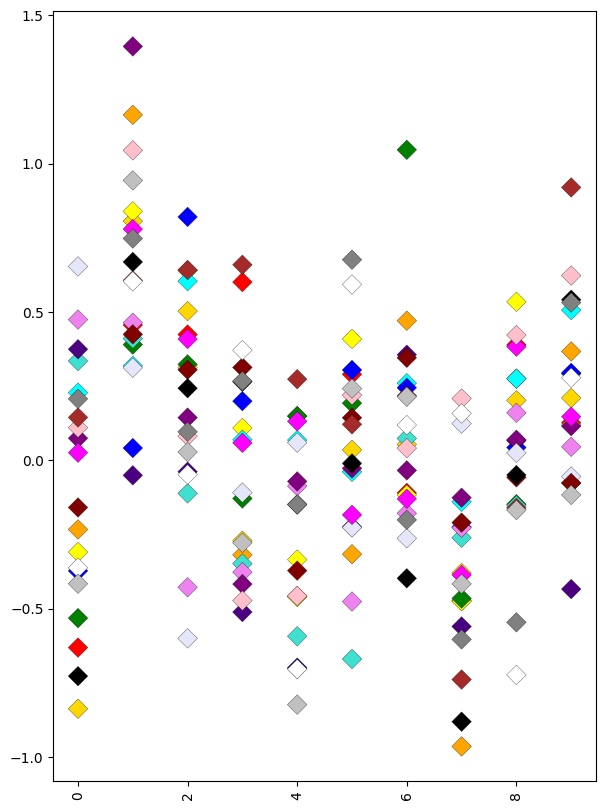

In [134]:
# selected_idx = top_colors.index[0]

# create new df with only selected column
paired_df = df[[selected_idx]]
# paired_df = df.iloc[:,selected_idx]
paired_df.insert(0, "color", color_words)
# print(paired_df)

# plot paired_df as points on a graph
# show the color word beside each point
# plt.scatter(paired_df['color'], paired_df[selected_idx], color=color_words, edgecolors='black', linewidths=0.2)
# plt.scatter([0 for i in range(len(paired_df[selected_idx]))], paired_df[selected_idx], color=color_words)
# plt.xticks(rotation=90)
# plt.show()

for j, selected_idx in enumerate(top_colors.index):
  paired_df = df[[selected_idx]]
  paired_df.insert(0, "color", color_words)
  # plt.scatter(paired_df['color'], paired_df[selected_idx], color=color_words, edgecolors='black', linewidths=0.2)
  plt.scatter([j for i in range(len(paired_df[selected_idx]))], paired_df[selected_idx], color=color_words, edgecolors='black', linewidths=0.2, marker='D', s=100)

# stretch out the y-axis
# plt.ylim(-1, 1)

# set chart height
plt.rcParams["figure.figsize"] = (7,10)
plt.xticks(rotation=90)
plt.show()

# # set background color
# plt.rcParams['axes.facecolor'] = 'white'
# # # set background color
# ax = plt.gca()
# # ax.set_facecolor('xkcd:light grey')

0     0.611688
1     1.231950
2    -0.140742
3     1.085461
4     1.116600
5     2.148425
6    -1.396042
7     0.649565
8    -1.173731
9    -0.632111
10    1.120164
11   -0.081023
12    1.232351
13    0.654589
14    1.818684
15    2.682327
16   -1.053865
17    0.282818
18    1.025399
19   -0.793118
dtype: float32


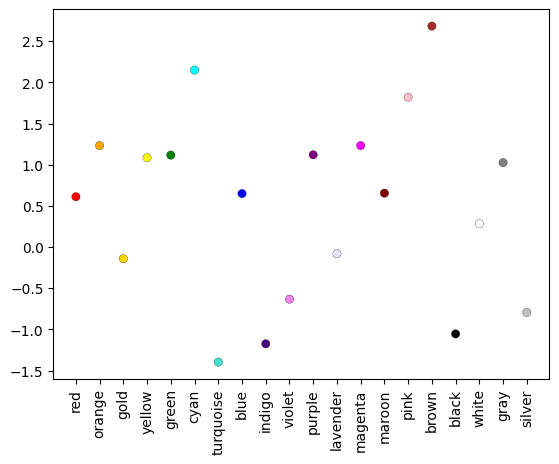

In [68]:
# create new df with top 10 colors with highest std dev
top_df = df[top_colors.index]
# top_df.insert(0, "color", color_words
# print(top_df)

# sum the columns of the top 10 colors
sum_top_df = top_df.sum(axis=1)
print(sum_top_df)

# plot sum_top_df as points on a graph
plt.scatter(color_words, sum_top_df, color=color_words, edgecolors='black', linewidths=0.2)
# plt.scatter([0 for i in range(len(sum_top_df))], sum_top_df, color=color_words)
plt.xticks(rotation=90)
plt.show()

In [69]:
import plotly.express as px
from sklearn.decomposition import PCA

In [70]:
# perform PCA
pca = PCA(n_components=3)
components = pca.fit_transform(df)

In [73]:
# turn components into a dataframe
components_df = pandas.DataFrame(components)
components_df.columns = components_df.columns.astype(str)
components_df.insert(0, "color", color_words)
components_df.head()

,color,0,1,2
0,red,-1.769199,-1.129959,-0.724373
1,orange,-0.056656,-1.526363,-0.809282
2,gold,-1.670604,1.669255,2.775040
3,yellow,-1.659518,-0.736385,-0.302053
4,green,-0.212067,-0.933023,-0.009902


In [74]:
fig = px.scatter_3d(
    components_df, x='0', y='1', z='2', color='color',
    hover_data={'color': True, '0': False, '1': False, '2': False},
    color_discrete_sequence=color_words
)
fig.show()

In [75]:
# Do UMAP on the color embeddings
import umap
import numpy as np

In [76]:
# create a numpy array from the color embeddings
color_embeddings_np = np.array(color_embeddings)
print(color_embeddings_np.shape)

(20, 768)


In [92]:
# perform UMAP
reducer = umap.UMAP(
        n_neighbors=2,
        min_dist=0.1,
        n_components=2,
        # metric='euclidean'
        metric='cosine'
)
embedding = reducer.fit_transform(color_embeddings_np)
embedding.shape

(20, 2)

In [93]:
# turn embedding into a dataframe
embedding_df = pandas.DataFrame(embedding)
embedding_df.columns = embedding_df.columns.astype(str)
embedding_df.insert(0, "color", color_words)

In [94]:
fig = px.scatter(
    embedding_df, x='0', y='1', color='color',
    hover_data={'color': True, '0': False, '1': False},
    color_discrete_sequence=color_words
)

fig.show()